In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import missingno
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
#from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor, StackingRegressor, GradientBoostingRegressor

#from category_encoders import CatBoostEncoder
from lazypredict.Supervised import LazyRegressor

import optuna
import xgboost as xgb
import catboost
import lightgbm



/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Display All Columns Dataset

In [3]:
pd.set_option('display.max_columns', None)

# Import Dataset

In [4]:
train_dataset = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
train_dataset.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(f"The shape of the training dataset is: {train_dataset.shape}")

The shape of the training dataset is: (1460, 81)


In [6]:
test_dataset = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
test_dataset.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
print(f"The shape of the test dataset is: {test_dataset.shape}")

The shape of the test dataset is: (1459, 80)


In [29]:
# Combining the train and test sets
combined_data = pd.concat((train_dataset, test_dataset), axis = 0)
combined_data.shape

(2919, 81)

# EDA

In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Check Null Values

In [11]:
train_null = train_dataset.isna().sum()
train_null.drop(labels='SalePrice', axis =0, inplace=True)

test_null = test_dataset.isna().sum()

#Compare the null values in both sets
train_null.compare(test_null).sort_values(by='self', ascending=False)

,self,other
PoolQC,1453.00,1456.00
MiscFeature,1406.00,1408.00
Alley,1369.00,1352.00
Fence,1179.00,1169.00
MasVnrType,872.00,894.00
FireplaceQu,690.00,730.00
LotFrontage,259.00,227.00
GarageType,81.00,76.00
GarageYrBlt,81.00,78.00
GarageFinish,81.00,78.00


## Sorting Missing Values By Percentage

In [8]:
missing_value = pd.DataFrame(data=train_dataset.isna().sum(), index=train_dataset.columns, columns=['Missing'])
missing_value['Percentage'] = (missing_value['Missing']/1460) * 100
missing_value = missing_value.sort_values(by='Percentage', ascending=False)

missing_value.head(20)

,Missing,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


## Visualize Missing Values

(<Axes: >, <Axes: >)

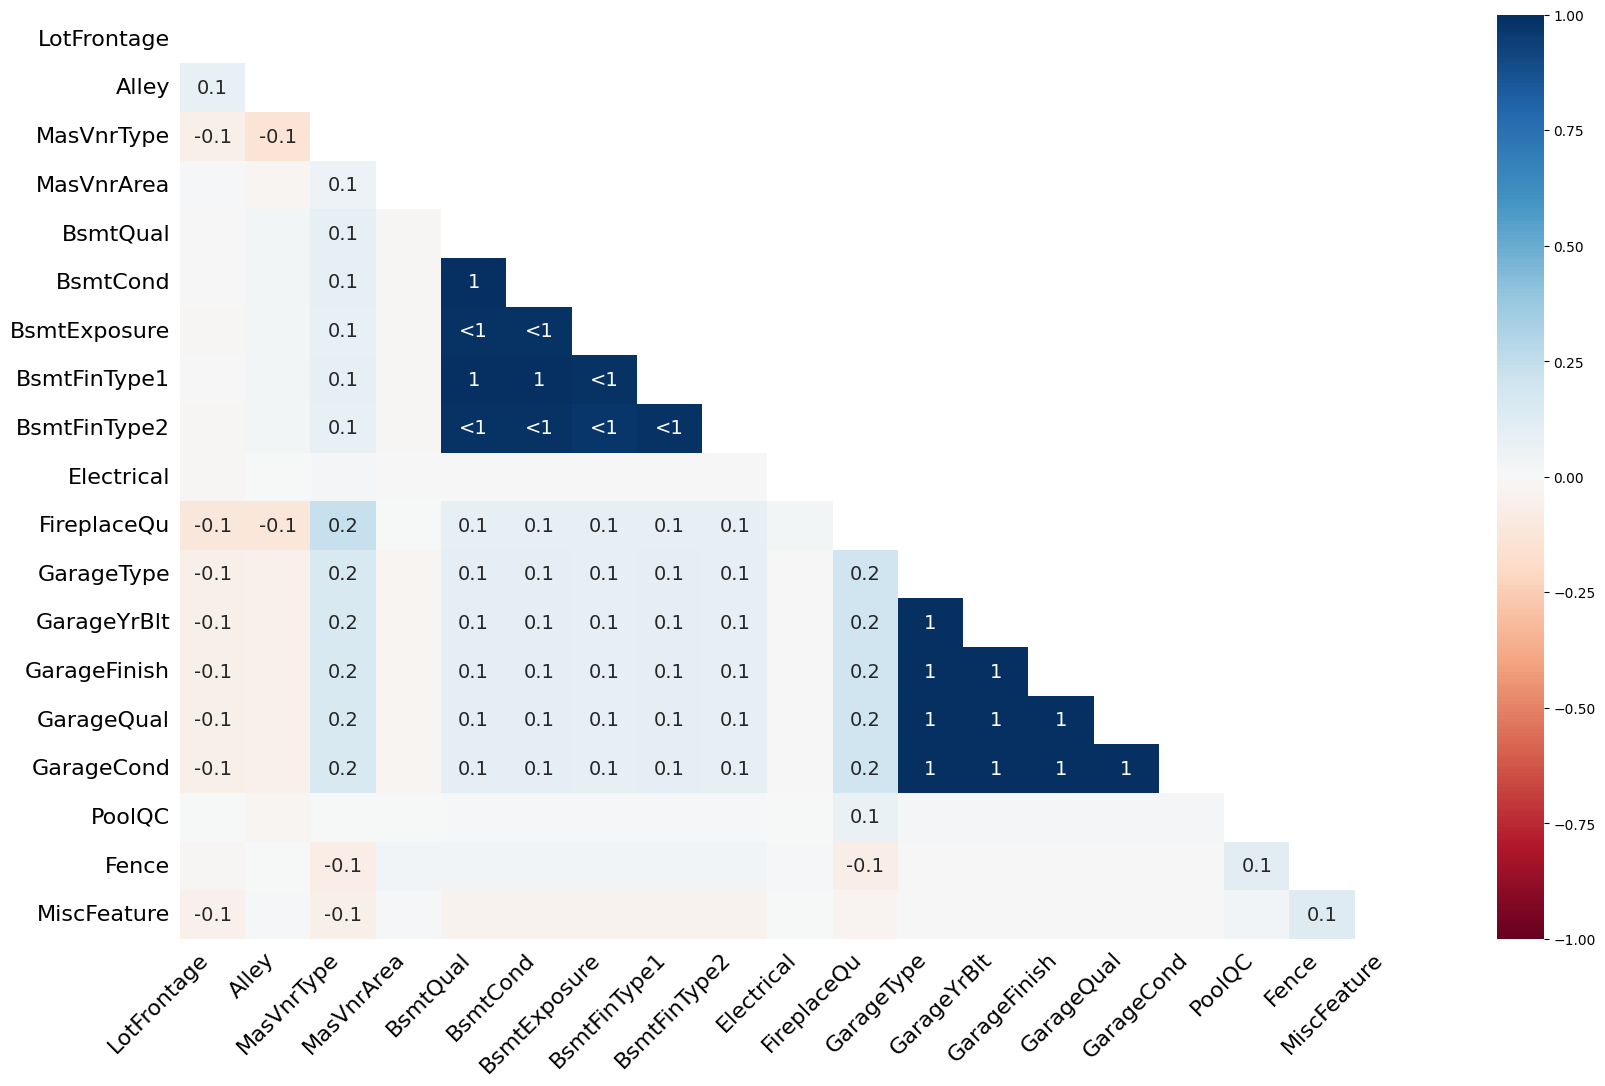

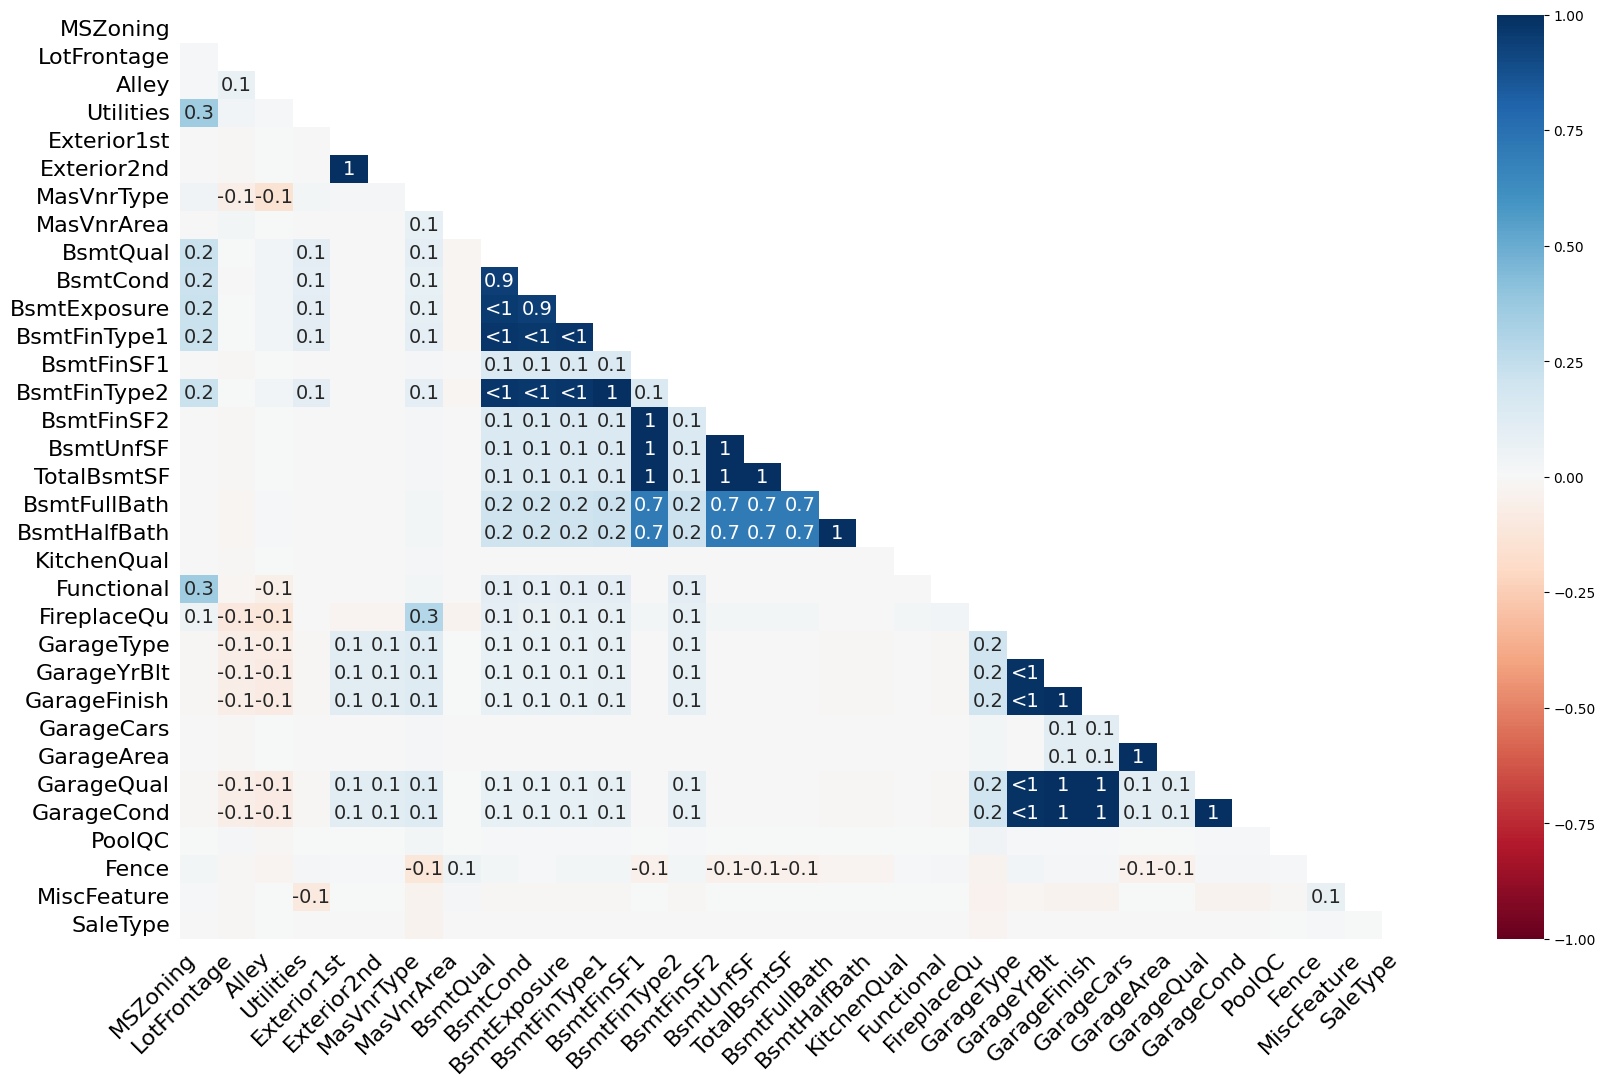

In [13]:
missingno.heatmap(df=train_dataset),missingno.heatmap(df=test_dataset)

## CHecking Distribution 

In [9]:
numerical_columns = train_dataset.select_dtypes(include=['int64', 'float']).columns.tolist()
categorical_columns = train_dataset.select_dtypes(include='object').columns.tolist()

numerical_columns = [col for col in numerical_columns if col != 'Id' and col != 'SalePrice']
discrete_columns = [col for col in numerical_columns if len(train_dataset[col].unique()) < 25]
continuous_columns = [col for col in numerical_columns if col not in discrete_columns]

print(f"Number of categorical features: {len(categorical_columns)}")
print(f"Number of numerical features:   {len(numerical_columns)}")
print(f"Number of discrete features:    {len(discrete_columns)}")
print(f"Number of continuous features:  {len(continuous_columns)}")

Number of categorical features: 43
Number of numerical features:   36
Number of discrete features:    18
Number of continuous features:  18


## The Distribution(Categorical Column)

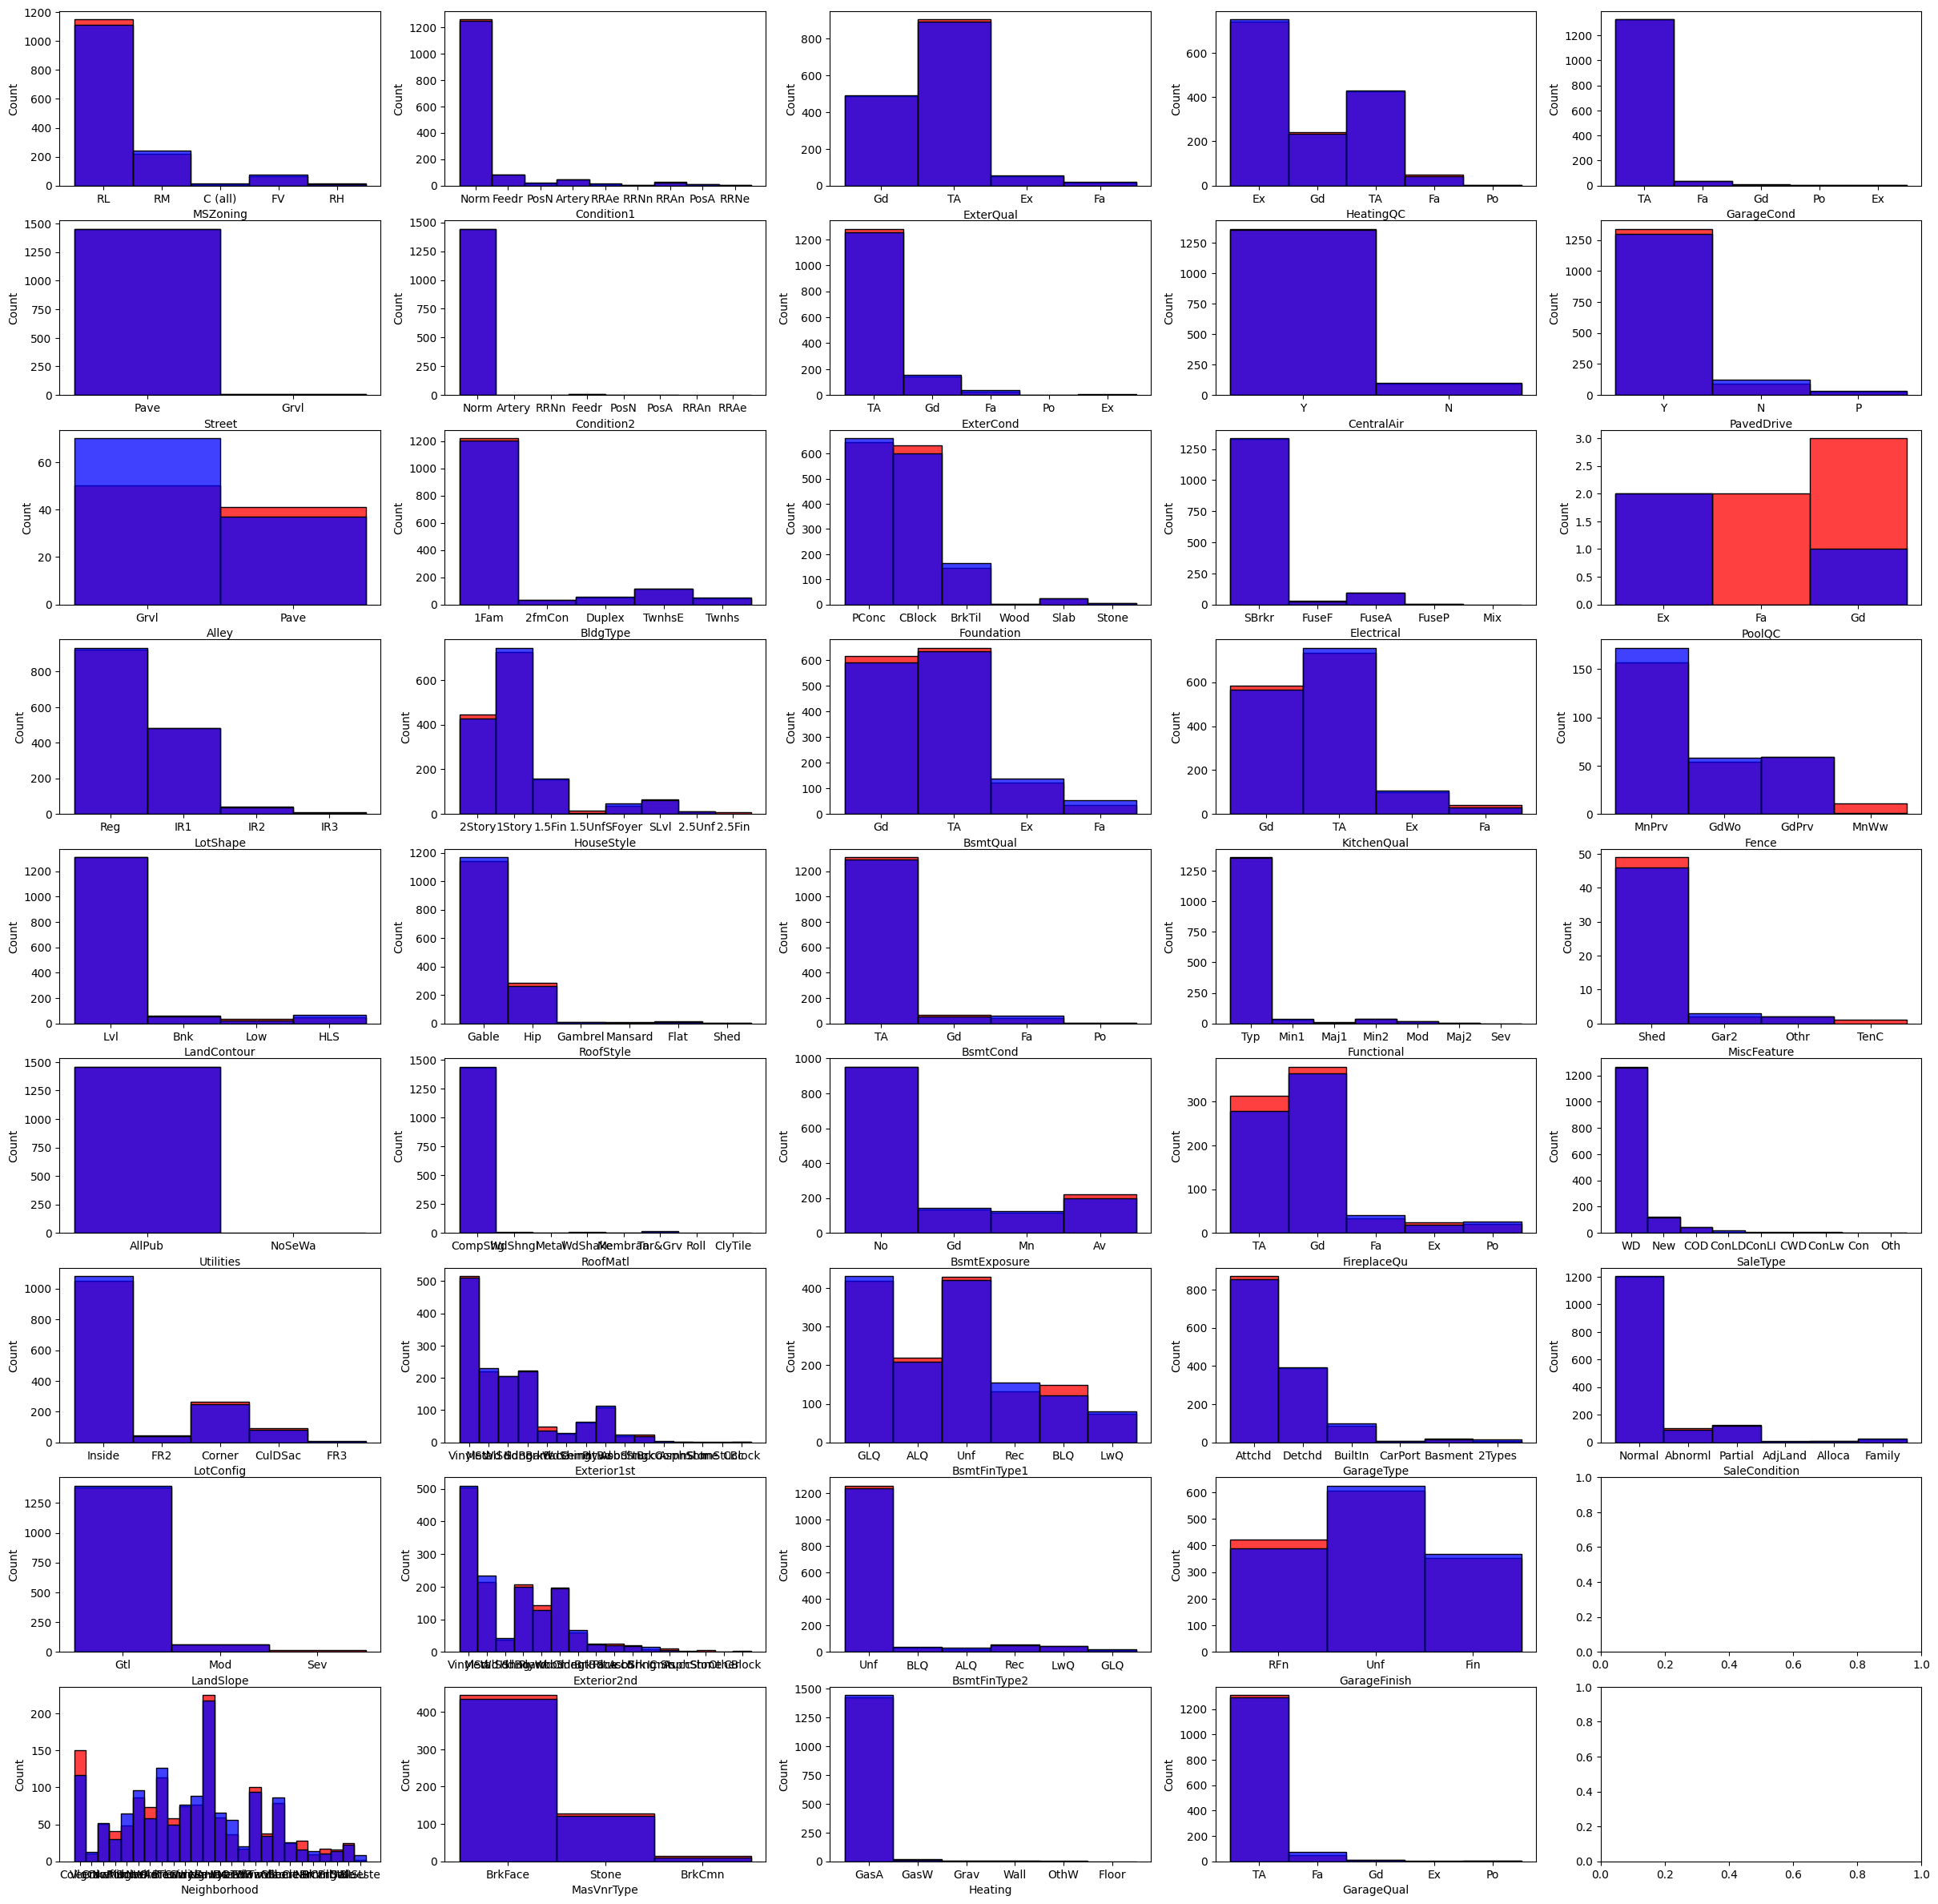

In [10]:
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(30,30))
for i, feature in enumerate(categorical_columns):
    sns.histplot(data=train_dataset, x=feature, ax=axes[i%9, i//9], color = 'red')
    sns.histplot(data=test_dataset, x=feature, ax=axes[i%9, i//9], color = 'blue')

### Continuous column

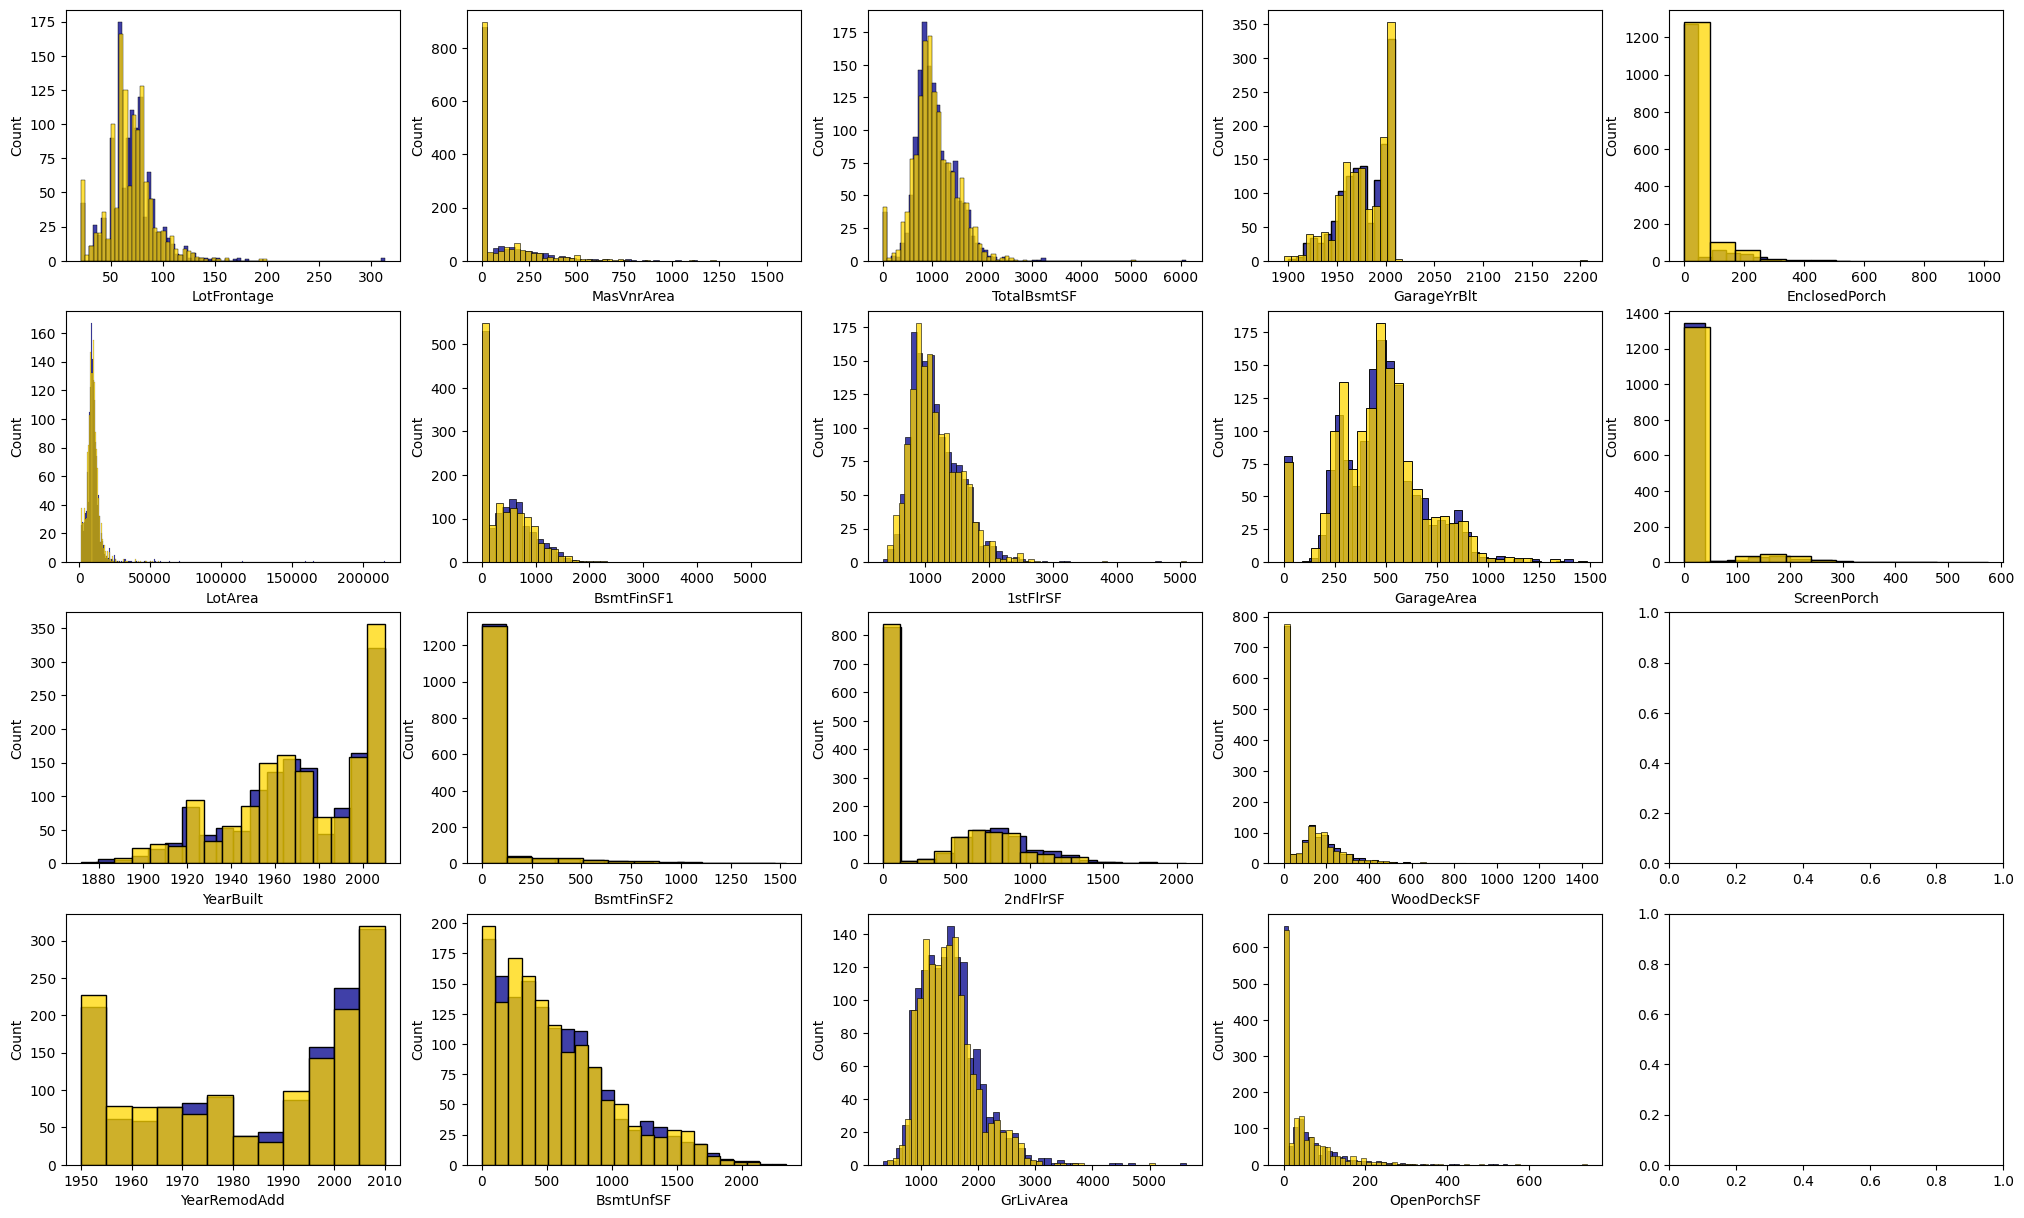

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25,15))
for i, feature in enumerate(continuous_columns):
    sns.histplot(data=train_dataset, x=feature, ax=axes[i%4, i//4], color = 'darkblue')
    sns.histplot(data=test_dataset, x=feature, ax=axes[i%4, i//4], color = 'gold')

## Discrete Column

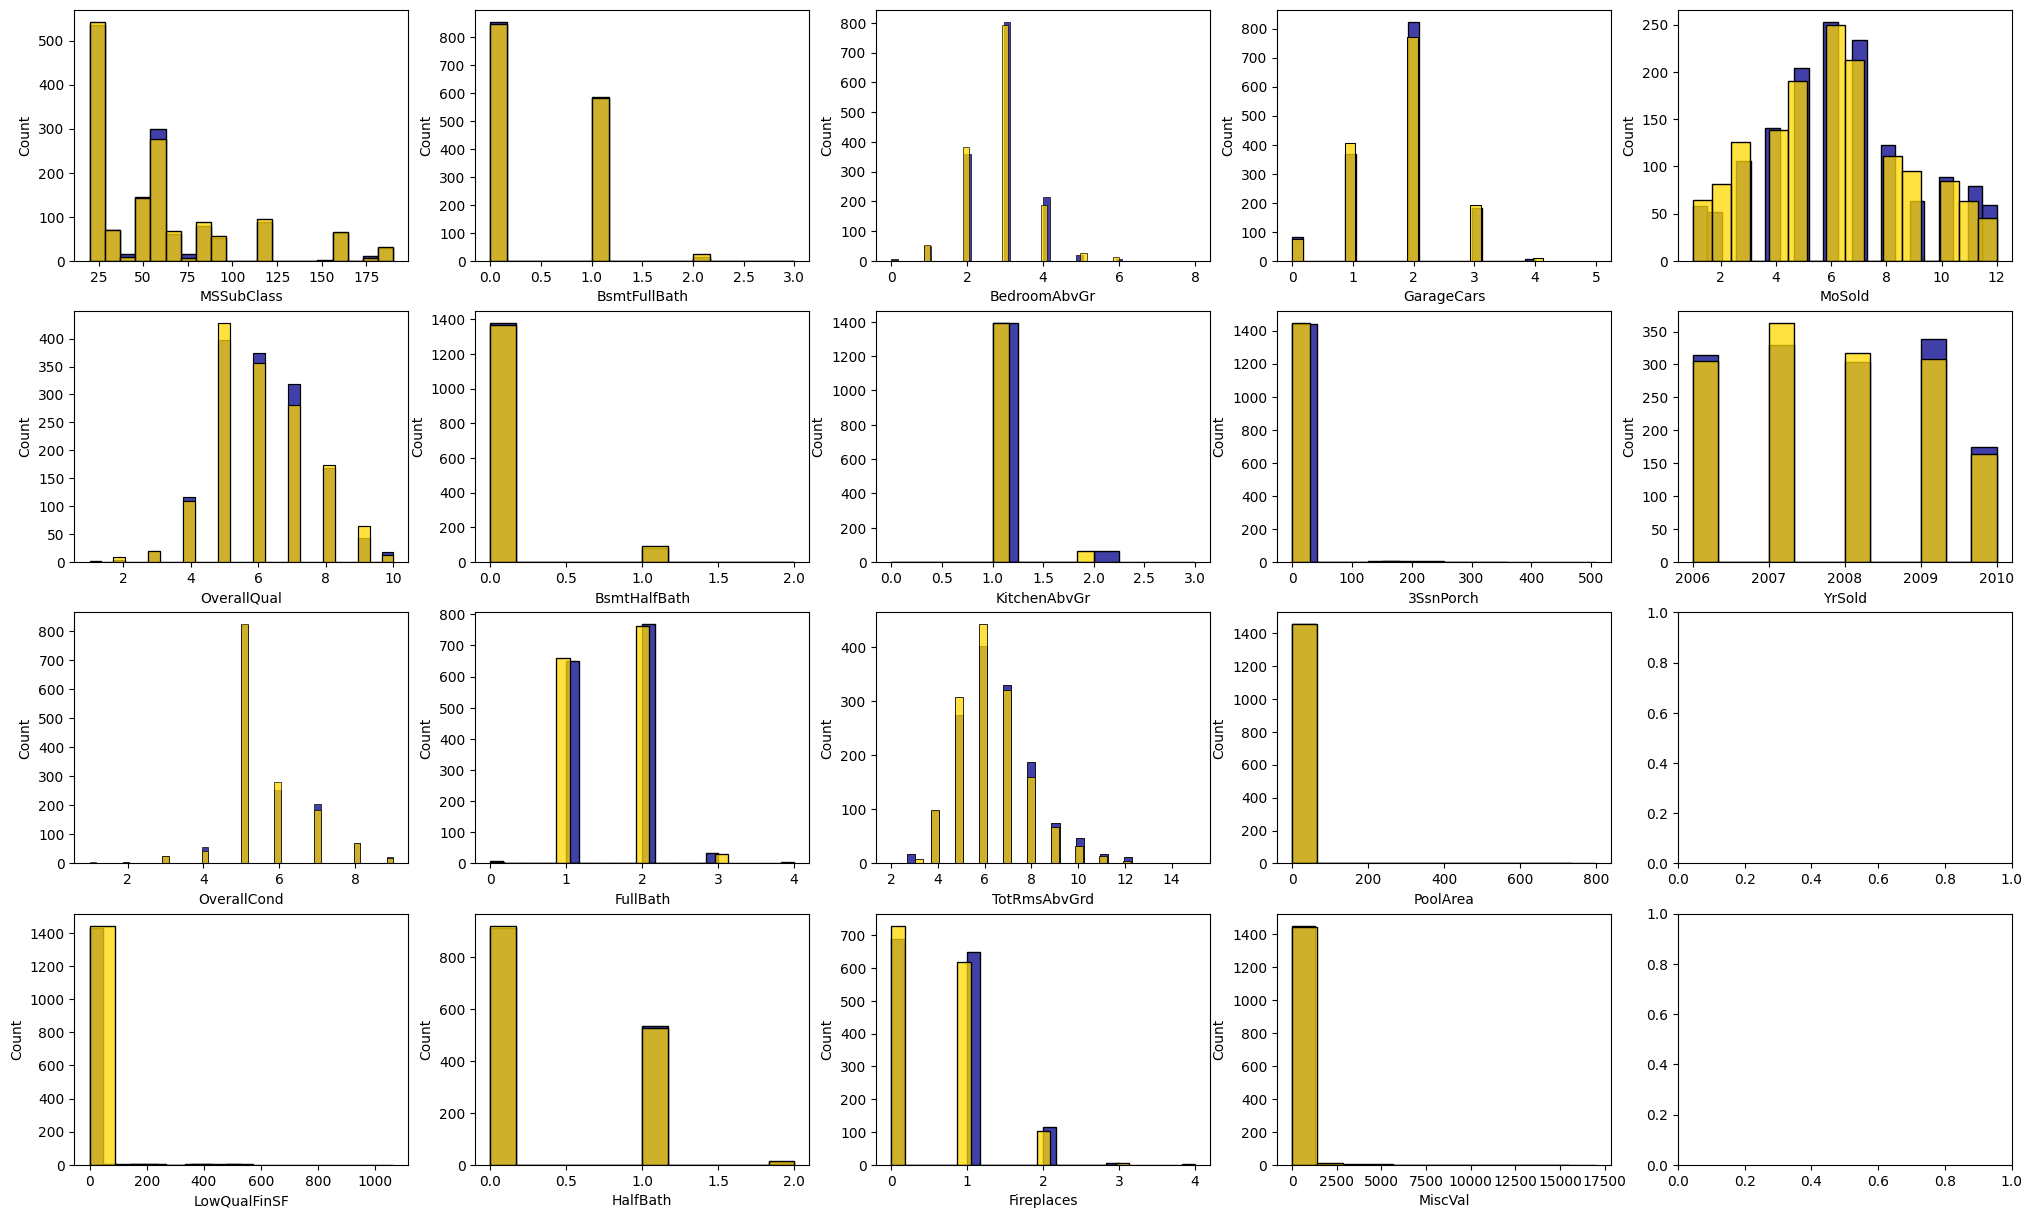

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25,15))
for i, feature in enumerate(discrete_columns):
    sns.histplot(data=train_dataset, x=feature, ax=axes[i%4, i//4], color = 'darkblue')
    sns.histplot(data=test_dataset, x=feature, ax=axes[i%4, i//4], color = 'gold')

## Checking Skewness

In [15]:
skew_trainset = train_dataset[numerical_columns].skew().sort_values(ascending=False)
skew_testset = test_dataset[numerical_columns].skew().sort_values(ascending=False)

avg_skewness = (skew_trainset + skew_testset)/2
avg_skewness = avg_skewness.sort_values(ascending=False)

print(avg_skewness)

MiscVal         22.28
PoolArea        17.51
LowQualFinSF    12.59
3SsnPorch       11.41
LotArea          7.66
KitchenAbvGr     4.28
BsmtFinSF2       4.15
ScreenPorch      3.96
BsmtHalfBath     3.94
EnclosedPorch    3.88
MasVnrArea       2.60
OpenPorchSF      2.53
WoodDeckSF       1.84
1stFlrSF         1.47
BsmtFinSF1       1.43
LotFrontage      1.41
MSSubClass       1.38
GrLivArea        1.25
TotalBsmtSF      1.17
BsmtUnfSF        0.92
2ndFlrSF         0.86
TotRmsAbvGrd     0.76
Fireplaces       0.73
HalfBath         0.70
BsmtFullBath     0.62
OverallCond      0.57
BedroomAbvGr     0.32
GarageArea       0.24
OverallQual      0.20
MoSold           0.20
FullBath         0.17
YrSold           0.13
GarageCars      -0.22
GarageYrBlt     -0.40
YearRemodAdd    -0.45
YearBuilt       -0.60
dtype: float64


## Label Distribution

<Axes: xlabel='SalePrice', ylabel='Count'>

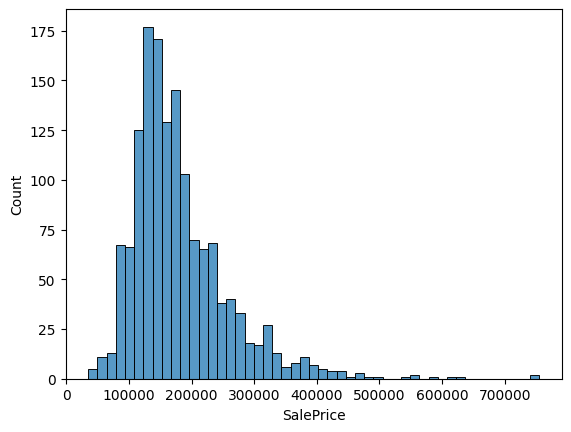

In [13]:
sns.histplot(data=train_dataset, x='SalePrice')

## Corelation Comparison

<Axes: >

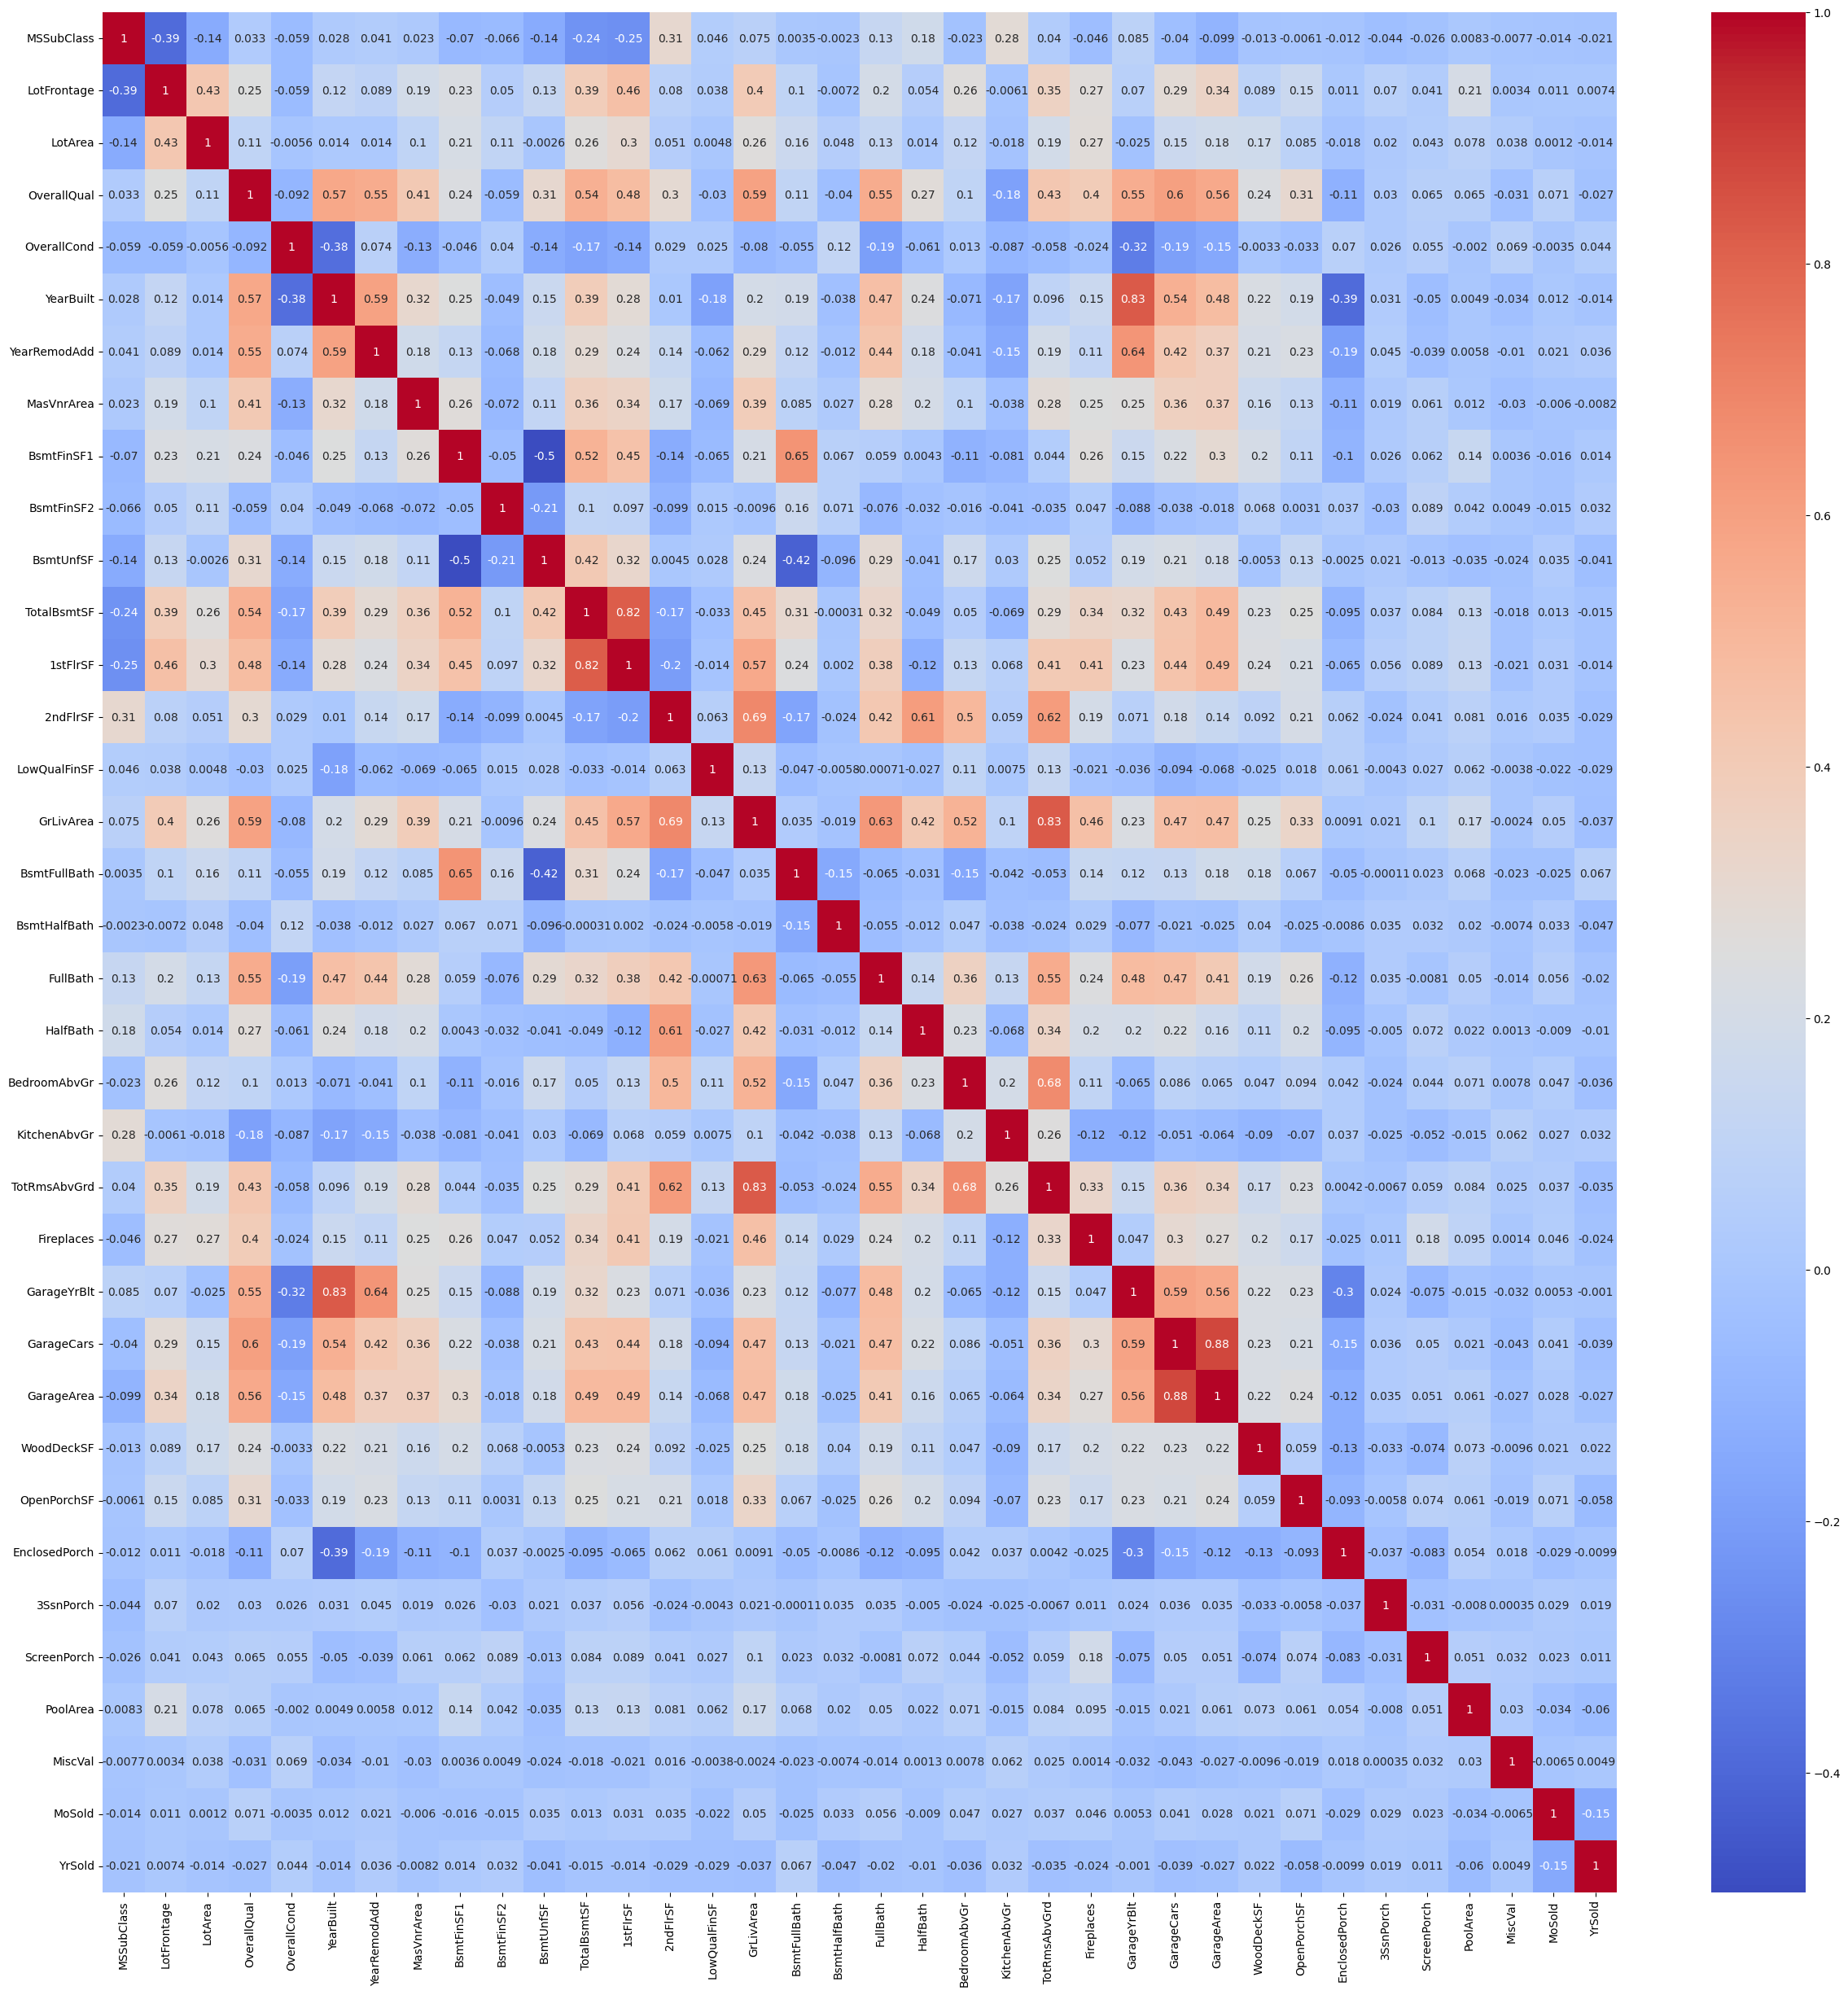

In [16]:
numeric_data = pd.DataFrame()

for feature in numerical_columns:
    numeric_data[feature] = train_dataset[feature]

corr_data = numeric_data.corr(method='pearson')

plt.figure(figsize=(30,30))
sns.heatmap(data= corr_data, cmap='coolwarm', annot=True, fmt='.2g')

<Axes: >

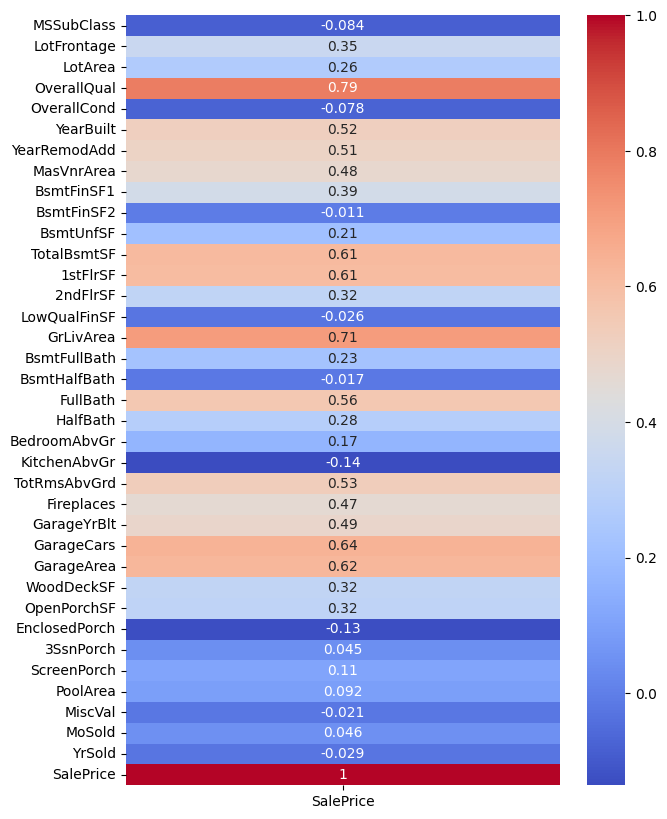

In [17]:
# CORRELATION WITH SALEPRICE

numeric_data['SalePrice'] = train_dataset['SalePrice'] 
corr_data = numeric_data.corr(method='pearson')
corr_data = corr_data[['SalePrice']]          # ONLY SHOWS CORRELATION FOR SALEPRICE FEATURE


plt.figure(figsize=(7,10))
sns.heatmap(data=corr_data, cmap='coolwarm', annot=True, fmt='.2g')

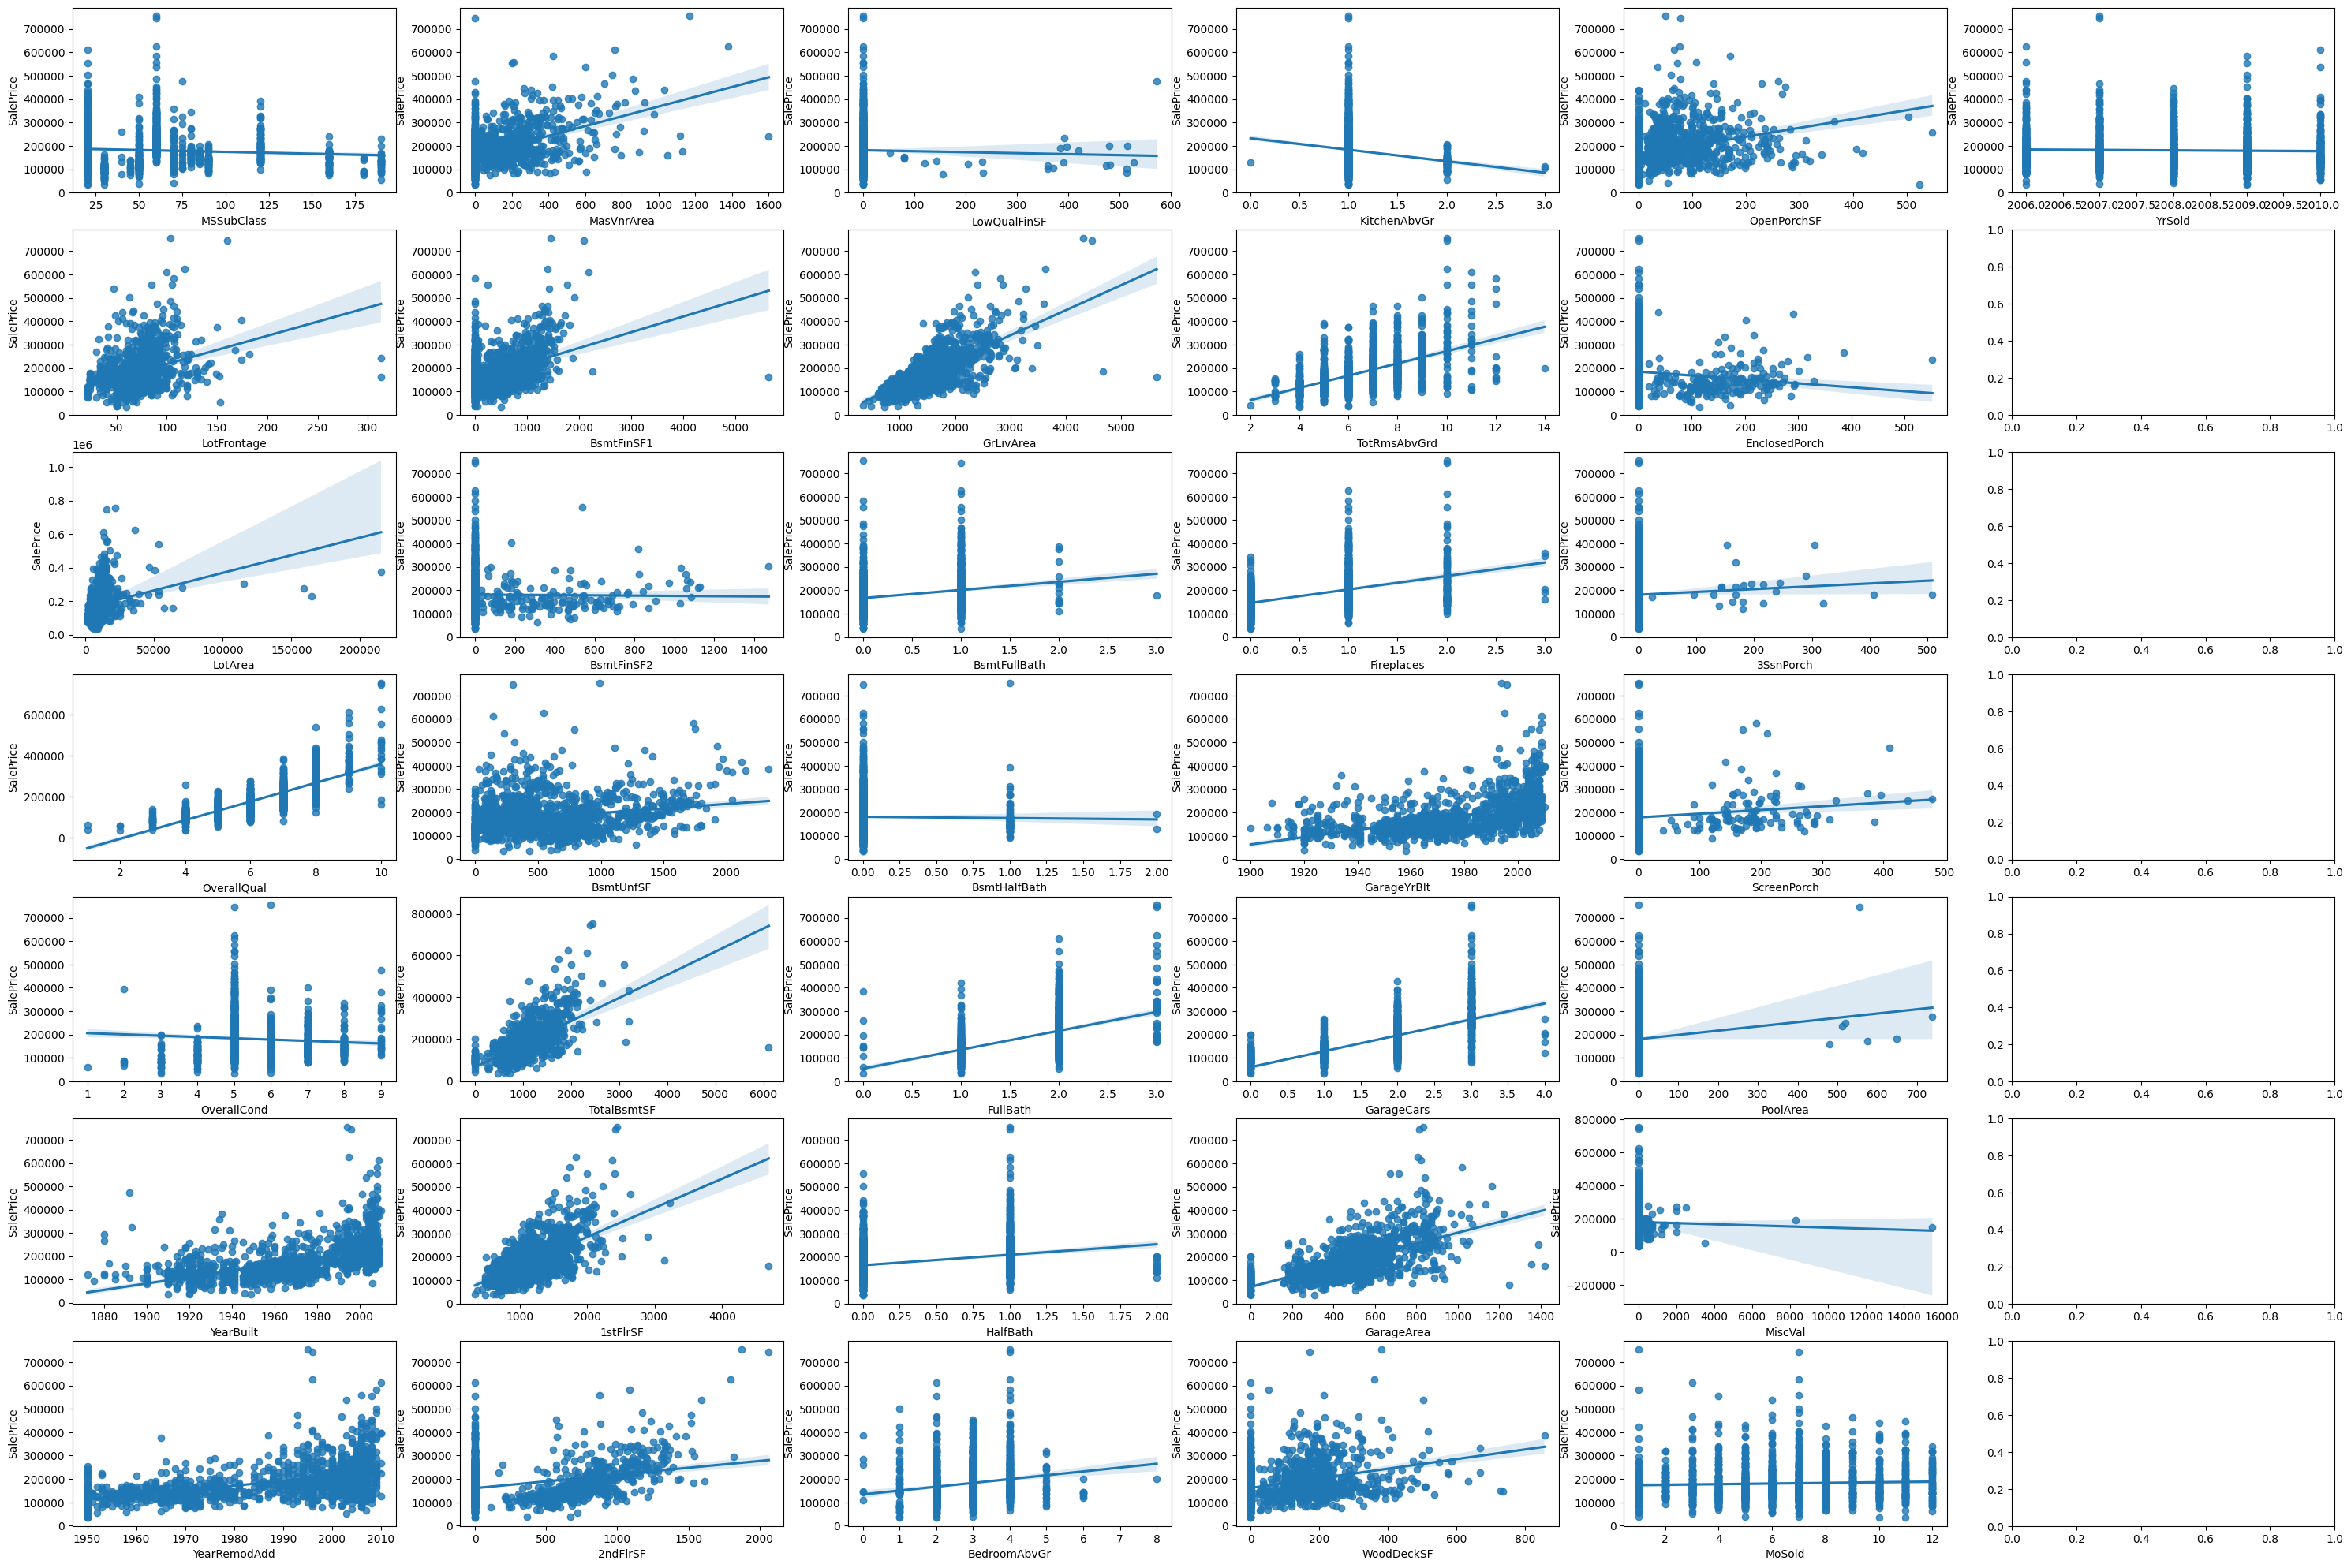

In [18]:
# LINEARITY USING SCATTER PLOT

fig , axes = plt.subplots(nrows=7, ncols=6, figsize=(37,25))

for i , feature in enumerate(numerical_columns):
    sns.regplot(data= train_dataset, x= feature, y= 'SalePrice', ax= axes[i%7, i//7])

plt.show()

Text(0.5, 1.0, 'House price vs YearSold')

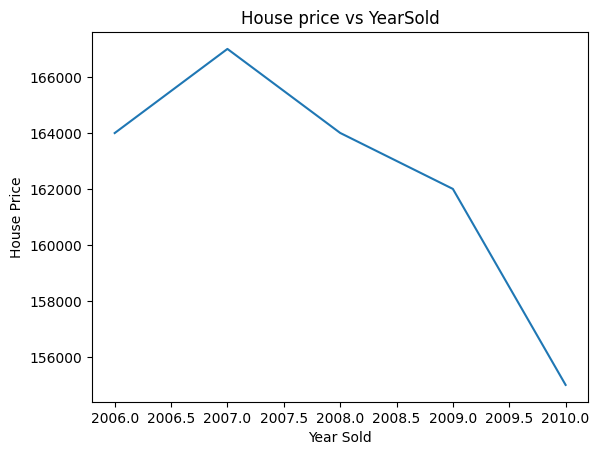

In [19]:
# RELATION BETWEEN YRSOLD AND SALEPRICE
combined_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.title('House price vs YearSold')

In [30]:
# FIRST DROP COLUMNS WITH MANY NULL VALUES
cols_with_many_null = ['PoolQC', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
combined_data.drop(labels=cols_with_many_null, axis=1, inplace=True)

# NEXT DROP COLUMNS WITH MANY ZERO VALUES
cols_with_many_zero = ['LowQualFinSF', 'MiscVal', '3SsnPorch', 'PoolArea']
combined_data.drop(labels=cols_with_many_zero, axis=1, inplace=True)

# LAST DROP COLUMNS WITH DOMINANT 1 LABEL
cols_with_dominant_label = ['Id','RoofMatl', 'Street', 'Condition2', 'Utilities', 'Heating']
combined_data.drop(labels=cols_with_dominant_label, axis=1, inplace=True)

combined_data.columns , len(combined_data.columns)  

(Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
        'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', 'ScreenPorch', 'MiscFeature', 'MoSold', 'YrSold',
        'SaleTyp

In [31]:
# FIND ALL DATE FEATURE
year_feature = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feature in year_feature:
    combined_data[feature] = combined_data['YrSold'] - combined_data[feature]

combined_data[year_feature].head(5) 

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.00
1,31,31,31.00
2,7,6,7.00
3,91,36,8.00
4,8,8,8.00


In [34]:
# FILL NUMERICAL MISSING VALUES WITH ZERO VALUES
numerical_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numerical_columns:
    combined_data[feature] = combined_data[feature].fillna(0)

# FILL CONTINUOUS MISSING VALUES 
dropped_cols = cols_with_dominant_label + cols_with_many_null
mode_feature = ['Electrical', 'MsZoning', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Utilities', 'SaleType']


for feature in categorical_columns:
    if feature not in dropped_cols:
        if feature not in mode_feature:
            combined_data[feature] = combined_data[feature].fillna('Unknown')
        else:
            combined_data[feature] = combined_data[feature].fillna(combined_data[feature].mode()[0])

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   LotShape       2919 non-null   object 
 4   LandContour    2919 non-null   object 
 5   LotConfig      2919 non-null   object 
 6   LandSlope      2919 non-null   object 
 7   Neighborhood   2919 non-null   object 
 8   Condition1     2919 non-null   object 
 9   BldgType       2919 non-null   object 
 10  HouseStyle     2919 non-null   object 
 11  OverallQual    2919 non-null   int64  
 12  OverallCond    2919 non-null   int64  
 13  YearBuilt      2919 non-null   int64  
 14  YearRemodAdd   2919 non-null   int64  
 15  RoofStyle      2919 non-null   object 
 16  Exterior1st    2919 non-null   object 
 17  Exterior2nd    2919 non-null   object 
 18  MasVnrType   

In [35]:
# ADD NEW FEATURE 'GarageEfficiency'
combined_data['GarageEfficiency'] = combined_data['GarageArea'] / (combined_data['GarageCars'] + 1)   # +1 TO AVOID DIVISION BY ZERO

# ADD NEW FEATURE 
#combined_data['LivabilityScore'] = combined_data['GrLivArea'] + (combined_data['FullBath'] * 2) + (combined_data['HalfBath'])

# ADD NEW FEATURE TotalArea
combined_data['TotalArea'] = combined_data['GrLivArea'] + combined_data['TotalBsmtSF']

In [ ]:
# CHECK CORRELATION OF NEW FEATURE 

new_feature = combined_data[['SalePrice','GarageEfficiency','GarageArea','GarageCars','TotalArea','GrLivArea','TotalBsmtSF']]

corr_new_feature = new_feature.corr(method='spearman')

sns.heatmap(data=corr_new_feature, cmap='coolwarm', annot=True, fmt='.2g')

# Feature Selection

# Defining Hyperparameters

In [ ]:
def objective(trial):
    xgb_params = {
        "learning_rate": trial.suggest_float("xgb_learning_rate",0.0001,0.1, log=True),
        "max_depth": trial.suggest_int("xgb_max_depth",3,12),
        "subsample": trial.suggest_float("xgb_subsample",0.5,1.0),
        "colsample_bytree": trial.suggest_float("xgb_colsample_bytree",0.5,1.0),
        "n_estimators": trial.suggest_int("xgb_n_estimators",50,300),
    }

    cat_params = {
        "learning_rate": trial.suggest_float("cat_learning_rate",0.0001,0.1, log=True),
        "depth": trial.suggest_int("cat_depth",3,10),
        "iterations": trial.suggest_int("cat_iterations",100,500),
        "l2_leaf_reg": trial.suggest_float("cat_l2_leaf_reg",0.0001,0.1, log=True),
        "subsample": trial.suggest_float("cat_subsample",0.5,1.0),
        "random_strength": trial.suggest_float("cat_random_strength",0.0001,0.1),
        
    }

    xgb = XGBRegressor(**xgb_params, objective='reg:squarederror')
    cat = CatBoostRegressor(**cat_params, loss_function='RMSE', verbose=0)


    pipeline = Pipeline([('preprocessor', preprocessor),
                         ('voting_regressor', VotingRegressor([('xgb', xgb), ('cat', cat)]))
                        ])
    
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    
    return score

# Running Optuna

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
print(best_params)

# Training The Model

In [ ]:
best_xgb_params = {
        "learning_rate": study.best_params['xgb_learning_rate'],
        "max_depth": study.best_params['xgb_max_depth'],
        "subsample": study.best_params['xgb_subsample'],
        "colsample_bytree": study.best_params['xgb_colsample_bytree'],
        "n_estimators": study.best_params['xgb_n_estimators'],
}
best_cat_params = {
        "learning_rate": study.best_params['cat_learning_rate'],
        "depth": study.best_params['cat_depth'],
        "iterations": study.best_params['cat_iterations'],
        "l2_leaf_reg": study.best_params['cat_l2_leaf_reg'],
        "subsample": study.best_params['cat_subsample'],
        "random_strength": study.best_params['cat_random_strength'],
}  

xgb_2 = XGBRegressor(**best_xgb_params, objective='reg:squarederror')
cat_2 = CatBoostRegressor(**best_cat_params, loss_function='RMSE', verbose=0)

pipeline_2 = Pipeline([('preprocessor', preprocessor),
                     ('voting_regressor', VotingRegressor([('xgb', xgb_2), ('cat', cat_2)]))
                        ])
pipeline_2.fit(X_train,y_train)
test_score = pipeline_2.score(X_test,y_test)
print(f"The Model Accuracy is {test_score}")


# Making Predictions

In [ ]:
y_pred = pipeline_2.predict(test_df)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error is: {mse}")
# print(f"Mean Average Error is: {mae}")
# print(f"r2 score: {r2}")
result = pd.DataFrame()
result['Id'] = test_Id
result['SalePrice'] = y_pred
result.to_csv('submission.csv', index=False)